<a href="https://colab.research.google.com/github/leoka90/Chandan-Kumar-Sah/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impoting Libraries**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


**Importing Dataset**

In [56]:
dataframe=pd.read_csv("/content/Iris.csv")
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Datatypes**

In [57]:
dataframe.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [58]:
dataframe.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**Normalize Feature**

In [59]:
features = dataframe[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_values, columns=features.columns)
normalized_df['Species'] = dataframe['Species']
normalized_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


**Data Imputation**

In [60]:
dataframe['SepalLengthCm'] = dataframe['SepalLengthCm'].replace(0, dataframe['SepalLengthCm'].median())
dataframe['PetalWidthCm'] = dataframe['PetalWidthCm'].replace(0, dataframe['PetalWidthCm'].median())


**Dependent and Independent Variable**

In [61]:
from sklearn.preprocessing import LabelEncoder
X = dataframe.drop('Species', axis=1)
y = LabelEncoder().fit_transform(dataframe['Species'])
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Train-test split**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


**Smoote Technique**

In [66]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [68]:

print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())



Resampled class distribution:
1    35
2    35
0    35
Name: count, dtype: int64


**K-neighborClassifier**

In [79]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train_resampled,y_train_resampled)
    acc = accuracy_score(y_test, y_predictions_knn)
    print(f"K={k}: Accuracy = {acc:.2f}")


K=1: Accuracy = 1.00
K=2: Accuracy = 1.00
K=3: Accuracy = 1.00
K=4: Accuracy = 1.00
K=5: Accuracy = 1.00
K=6: Accuracy = 1.00
K=7: Accuracy = 1.00
K=8: Accuracy = 1.00
K=9: Accuracy = 1.00
K=10: Accuracy = 1.00


In [80]:
y_predictions_knn = Knn.predict(X_test)
y_predictions_knn

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

**Confusion matrix**

In [81]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_predictions_knn))

confusion_matrix
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


**Accuracy**

In [82]:
accuracy_score(y_test,y_predictions_knn)

1.0

In [107]:
from matplotlib.colors import ListedColormap
X = dataframe.iloc[:, [1, 2]].values
y = LabelEncoder().fit_transform(dataframe['Species'])

In [117]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

**Decision boundaries**

In [118]:
h = .02  # mesh step
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [119]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


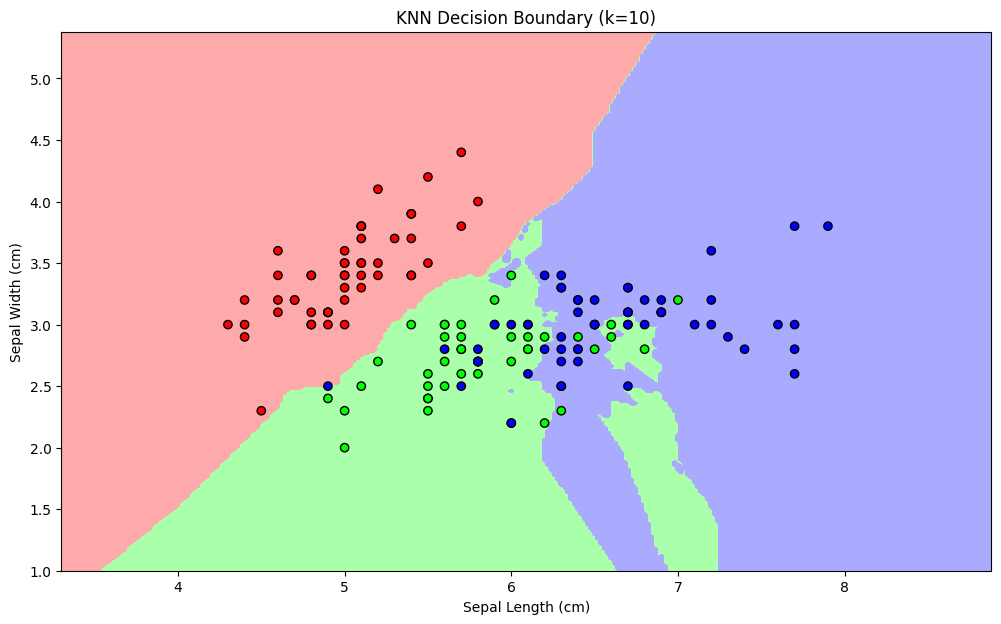

In [122]:
plt.figure(figsize=(12, 7))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("KNN Decision Boundary (k=10)")
plt.show()